0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. fit the model/algorithm and us it ot make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Put it all together

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X.shape, y.shape

((303, 13), (303,))

In [4]:
# 2. Chooose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [8]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8852459016393442

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.88        29

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[29,  3],
       [ 4, 25]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.8852459016393442

In [13]:
# 5. Improve the model
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100}\n')

Trying model with 10 estimators
Model accuracy on test set: 83.60655737704919

Trying model with 20 estimators
Model accuracy on test set: 85.24590163934425

Trying model with 30 estimators
Model accuracy on test set: 88.52459016393442

Trying model with 40 estimators
Model accuracy on test set: 86.88524590163934

Trying model with 50 estimators
Model accuracy on test set: 86.88524590163934

Trying model with 60 estimators
Model accuracy on test set: 88.52459016393442

Trying model with 70 estimators
Model accuracy on test set: 86.88524590163934

Trying model with 80 estimators
Model accuracy on test set: 88.52459016393442

Trying model with 90 estimators
Model accuracy on test set: 86.88524590163934



In [14]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open('random_forest_model_1.pk1', 'wb'))

In [15]:
loaded_model = pickle.load(open('random_forest_model_1.pk1', 'rb'))
loaded_model.score(X_test, y_test)

0.8688524590163934

In [16]:
loaded_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 90,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 1. Getting data ready to be used with machine learning

Three main things to do:
1. Split the data into features and labels (usually X and y)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [19]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((242, 13), (61, 13))

In [20]:
X_test.shape, y_test.shape

((242,), (61,))

### Make sure it's all numerical

In [21]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
len(car_sales)

1000

In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors'] # doors is numerical but only has 3 categories
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [28]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### Missing Values

In [30]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']
X.shape, y.shape

((1000, 4), (1000,))

#### Fill missing data with Pandas

In [33]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

C:\Users\smitt\AppData\Local\Temp\ipykernel_13020\1293086997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing', inplace=True)
C:\Users\smitt\AppData\Local\Temp\ipykernel_13020\1293086997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [34]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [35]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
len(car_sales_missing)

950

In [37]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']
X.shape, y.shape

((950, 4), (950,))

In [38]:
categorical_features = ['Make', 'Colour', 'Doors'] # doors is numerical but only has 3 categories
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Fill missing data with Scikit-Learn

In [39]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [44]:
y.isna().sum()

0

In [45]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [46]:
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled_test = pd.DataFrame(filled_X_test, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [47]:
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder='passthrough')

transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [48]:
np.random.seed(42)
model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [49]:
len(transformed_X_train.toarray()) + len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithsm for your problem

### 2.1 Regression

In [50]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [51]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [52]:
housing_df['MedHouseVal'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
housing_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [54]:
from sklearn.linear_model import Ridge

np.random.seed(42)
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440125

In [55]:
np.random.seed(42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8051230593157366

## 2.2 Classification

In [56]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
len(heart_disease)

303

In [58]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [59]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model and use it to make predictions

In [60]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [62]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [63]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

In [65]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [66]:
y_test[:5]

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [67]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [69]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [70]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating a model

### Evaluating a model with `score()`

In [73]:
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
clf.score(X_test, y_test)

0.8524590163934426

In [76]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
regr.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
cross_val_score(clf, X, y)

array([0.81967213, 0.90163934, 0.86885246, 0.8       , 0.78333333])

In [83]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [87]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics

#### Accuracy

In [89]:
np.random.seed(42)

cross_val_scores = cross_val_score(clf, X, y)

In [90]:
np.mean(cross_val_scores)

0.8248087431693989

In [91]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_scores) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under the receiver operating characteristic curve (AUC-ROC)

Comparison of a model's true positive rate (tpr) versus false positive rate (fpr)

In [93]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)

y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [94]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

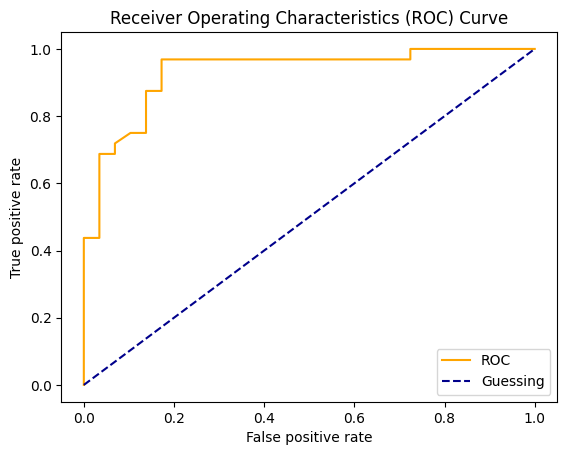

In [96]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [97]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

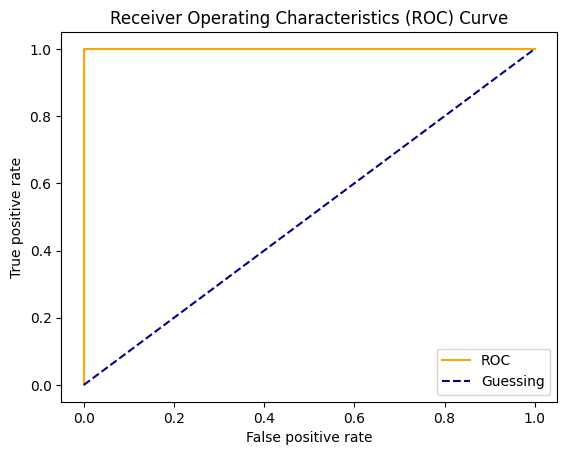

In [98]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [99]:
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [101]:
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


<Axes: >

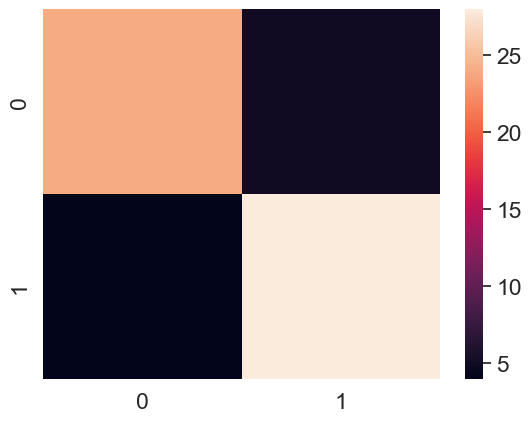

In [103]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

In [104]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

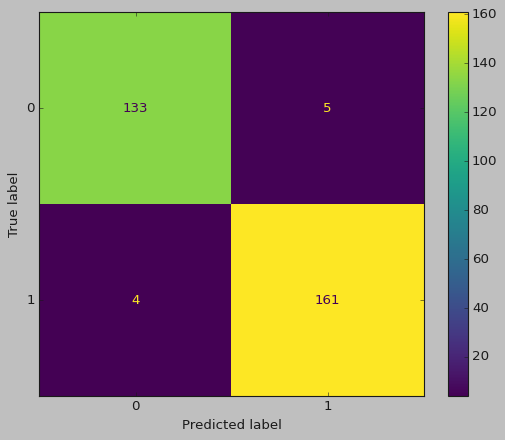

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('classic')
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

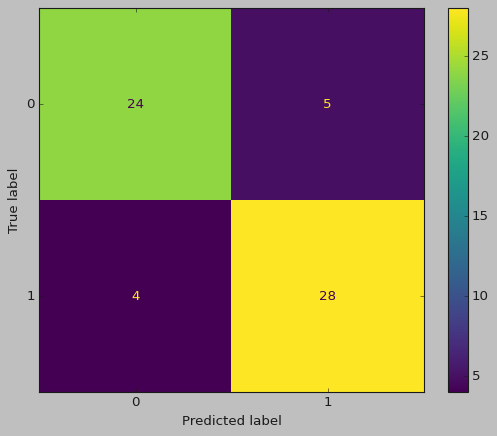

In [108]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

#### Classification Report

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [113]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\smitt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\smitt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\smitt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

#### R<sup>2</sup> Score

In [114]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
model.score(X_test, y_test)

0.8065734772187598

In [117]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [118]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [120]:
r2_score(y_test, y_test)

1.0

In [121]:
model.score(X_test, y_test)

0.8065734772187598

In [122]:
y_preds = model.predict(X_test)
r2_score(y_test, y_preds)

0.8065734772187598

#### Mean Absolute Error (MAE)

In [123]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [124]:
y_preds[:5], y_test[:5]

(array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ]),
 20046    0.47700
 3024     0.45800
 15663    5.00001
 20484    2.18600
 9814     2.78000
 Name: MedHouseVal, dtype: float64)

In [126]:
df = pd.DataFrame(data={'actual values': y_test, 'predicted values': y_preds})
df['differences'] = abs(df['predicted values'] - df['actual values'])
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,0.448240


In [127]:
df['differences'].mean()

0.32659871732073664

#### Mean Squared Error (MSE)

In [128]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [131]:
df['squared differences'] = np.square(df['differences'])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919


In [132]:
df['squared differences'].mean()

0.2534678520824551

### 4.2.3 Using the `scoring` parameter

In [133]:
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [134]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [136]:
print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%')

The cross-validated accuracy is: 82.48%


In [137]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [141]:
print(f'The cross-validated precision is: {np.mean(cv_precision)}')

The cross-validated precision is: 0.8329547346025924


In [142]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [143]:
print(f'The cross-validated recall is: {np.mean(cv_recall)}')

The cross-validated recall is: 0.8545454545454545


In [144]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

In [145]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [146]:
np.mean(cv_r2)

0.6520824166120266

In [147]:
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
cv_mae

array([-0.53895506, -0.4118183 , -0.43888317, -0.464205  , -0.47454934])

In [148]:
np.mean(cv_mae)

-0.4656821754069768

In [149]:
cv_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
cv_mse

array([-0.52564255, -0.34426975, -0.37057463, -0.44321933, -0.46308691])

In [150]:
np.mean(cv_mse)

-0.42935863518011796

### 4.3 Using different evaluation metrics as Scikit-Learn functions

In [151]:
from sklearn.metrics import f1_score, precision_score, recall_score

np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [154]:
np.random.seed(42)

X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('Regression metrics on the test set')
print(f'R2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R2: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## 5. Improving a model

In [155]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameter tuning by hand

In [164]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)}
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')

    return metric_dict

In [158]:
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

X_train.shape, y_train.shape

((212, 13), (212,))

In [159]:
X_valid.shape, y_valid.shape

((45, 13), (45,))

In [160]:
X_test.shape, y_test.shape

((46, 13), (46,))

In [161]:
len(heart_disease)

303

In [165]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [166]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [167]:
np.random.seed(42)

clf_3 = RandomForestClassifier(max_depth=10)
clf_3.fit(X_train, y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [170]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['log2', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [171]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [172]:
# Predictions will be made with the best params by default
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [173]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [174]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None, 10],
          'max_features': ['log2', 'sqrt'],
          'min_samples_split': [2, 6],
          'min_samples_leaf': [1, 2]}

In [175]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                     verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [176]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [177]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


In [178]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                 'clf_2': clf_2_metrics,
                                 'clf_3': clf_3_metrics,
                                 'random search': rs_metrics,
                                 'grid search': gs_metrics})
compare_metrics

,baseline,clf_2,clf_3,random search,grid search
accuracy,0.82,0.82,0.80,0.82,0.82
precision,0.81,0.84,0.81,0.77,0.77
recall,0.88,0.84,0.84,0.86,0.86
f1,0.85,0.84,0.82,0.81,0.81


<Axes: >

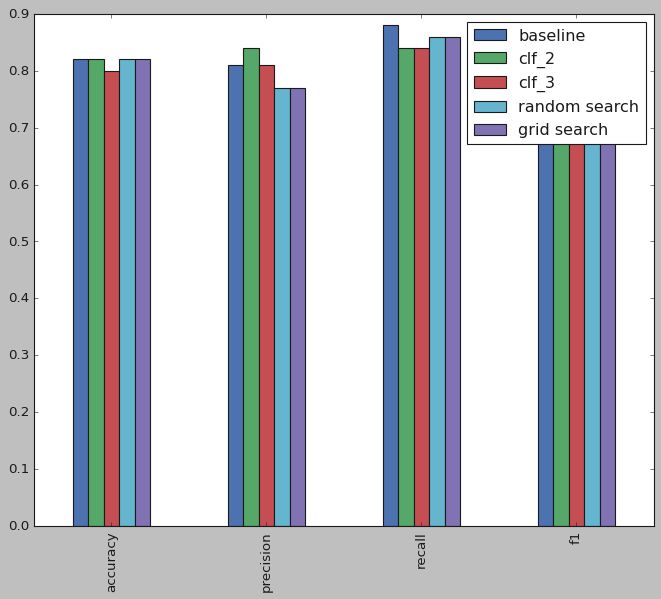

In [179]:
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading trained machine learning models

In [180]:
import pickle

pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [181]:
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [184]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [185]:
from joblib import dump, load

dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [186]:
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [188]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

In [189]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [190]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [191]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [193]:
from sklearn.pipeline import Pipeline

np.random.seed(42)
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(transformers=[
                                            ('cat', categorical_transformer, categorical_features),
                                            ('door', door_transformer, door_feature),
                                            ('num', numeric_transformer, numeric_features)
])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor())])

X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [194]:
pipe_grid = {'preprocessor__num__imputer__strategy': ['mean', 'median'],
             'model__n_estimators': [100, 1000],
             'model__max_depth': [None, 5],
             'model__max_features': [None, 'sqrt'],
             'model__min_samples_split': [2, 4]}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None, 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [195]:
gs_model.score(X_test, y_test)

0.292308819012865

In [196]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}